In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### County ID

In [3]:
cnty_id = pd.read_csv('./datasets/county_id.csv',dtype='str')

In [4]:
cnty_id.shape

(43934, 7)

In [5]:
cnty_id = cnty_id[cnty_id['State Code'] == '06']

In [6]:
cnty_id.head(2)

,Summary Level,State Code,County Code,Subdivision Code,Place Code,City Code,Name
1393,040,06,000,00000,00000,00000,California
1394,050,06,001,00000,00000,00000,Alameda County


In [7]:
cnty_id['ID'] = cnty_id['State Code'] + cnty_id['County Code']
cnty_id.head(2)

,Summary Level,State Code,County Code,Subdivision Code,Place Code,City Code,Name,ID
1393,040,06,000,00000,00000,00000,California,06000
1394,050,06,001,00000,00000,00000,Alameda County,06001


In [8]:
cnty_id.drop(columns = ['Summary Level','State Code','County Code','Subdivision Code','Place Code','City Code'],inplace=True)

In [9]:
cnty_id.head(2)

,Name,ID
1393,California,06000
1394,Alameda County,06001


### Population

In [10]:
pop = pd.read_csv('datasets/county_census.csv')
pop.head()

,CTYNAME,Pop,GrowthRate
0,Los Angeles County,10105518,2.8820
1,San Diego County,3343364,7.7356
2,Orange County,3185968,5.6160
3,Riverside County,2450758,11.3145
4,San Bernardino County,2171603,6.4037


In [11]:
ids = []
for name in pop['CTYNAME']:
    ids.append(cnty_id[cnty_id['Name'] == name]['ID'].values[0])

In [12]:
cnty_id[cnty_id['Name'] == 'Alameda County']['ID'].values[0]

'06001'

In [13]:
pop['ID'] = ids
pop.head()

,CTYNAME,Pop,GrowthRate,ID
0,Los Angeles County,10105518,2.8820,06037
1,San Diego County,3343364,7.7356,06073
2,Orange County,3185968,5.6160,06059
3,Riverside County,2450758,11.3145,06065
4,San Bernardino County,2171603,6.4037,06071


In [14]:
pop.to_csv('population1.csv')

### Powerplants

In [15]:
plants = pd.read_csv('datasets/power_plants_01-14.csv')

In [16]:
plants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Plant Type Code    2140 non-null   object
 1   RPS Eligible       2140 non-null   object
 2   Primary Fuel Type  2139 non-null   object
 3   Solar Thermal      2140 non-null   object
 4   Small Hydro        2140 non-null   object
 5   CEC Plant ID       2140 non-null   object
 6   EIA Plant ID       2130 non-null   object
 7   Plant Name         2140 non-null   object
 8   Unit               2140 non-null   object
 9   State              2140 non-null   object
 10  County             2140 non-null   object
 11  City               2078 non-null   object
 12  Start Date         2140 non-null   object
 13  Retire Date        271 non-null    object
 14  2014               1778 non-null   object
 15  2013               1731 non-null   object
 16  2012               1591 non-null   object


In [17]:
def convert_to_float(series):

    float_list = []

    for i in series:
        try:
            float_list.append(float(i))

        except:
            float_list.append(float(0))
    
    return float_list

In [18]:
plants['2014'] = convert_to_float(plants['2014'].fillna(0))
plants['2013'] = convert_to_float(plants['2013'].fillna(0))
plants['2012'] = convert_to_float(plants['2012'].fillna(0))
plants['2011'] = convert_to_float(plants['2011'].fillna(0))
plants['2010'] = convert_to_float(plants['2010'].fillna(0))
plants['2009'] = convert_to_float(plants['2009'].fillna(0))
plants['2008'] = convert_to_float(plants['2008'].fillna(0))
plants['2007'] = convert_to_float(plants['2007'].fillna(0))
plants['2006'] = convert_to_float(plants['2006'].fillna(0))
plants['2005'] = convert_to_float(plants['2005'].fillna(0))
plants['2004'] = convert_to_float(plants['2004'].fillna(0))
plants['2003'] = convert_to_float(plants['2003'].fillna(0))
plants['2002'] = convert_to_float(plants['2002'].fillna(0))
plants['2001'] = convert_to_float(plants['2001'].fillna(0))

In [19]:
plants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 28 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Plant Type Code    2140 non-null   object 
 1   RPS Eligible       2140 non-null   object 
 2   Primary Fuel Type  2139 non-null   object 
 3   Solar Thermal      2140 non-null   object 
 4   Small Hydro        2140 non-null   object 
 5   CEC Plant ID       2140 non-null   object 
 6   EIA Plant ID       2130 non-null   object 
 7   Plant Name         2140 non-null   object 
 8   Unit               2140 non-null   object 
 9   State              2140 non-null   object 
 10  County             2140 non-null   object 
 11  City               2078 non-null   object 
 12  Start Date         2140 non-null   object 
 13  Retire Date        271 non-null    object 
 14  2014               2141 non-null   float64
 15  2013               2141 non-null   float64
 16  2012               2141 

### Convert date times, compute age, label status

In [20]:
plants['Start Date'] = pd.to_datetime(plants['Start Date'])
plants['Retire Date'] = pd.to_datetime(plants['Retire Date'])

ages =[]
status = []
for i in range(plants.shape[0]):
    if type(plants['Retire Date'].iloc[i]) == pd._libs.tslibs.timestamps.Timestamp:
        ages.append(plants['Retire Date'].iloc[i] - plants['Start Date'].iloc[i])
        status.append(0)
    else:
        ages.append(pd.Timestamp.now() - plants['Start Date'].iloc[i])
        status.append(1)

In [21]:
plants['Age'] = ages
plants['Status'] = status

for i in plants.index:
    plants['Age'][i] = float(plants['Age'][i].days/365)

/Users/Sam/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Users/Sam/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [22]:
plants['Status'].value_counts()

1    1870
0     271
Name: Status, dtype: int64

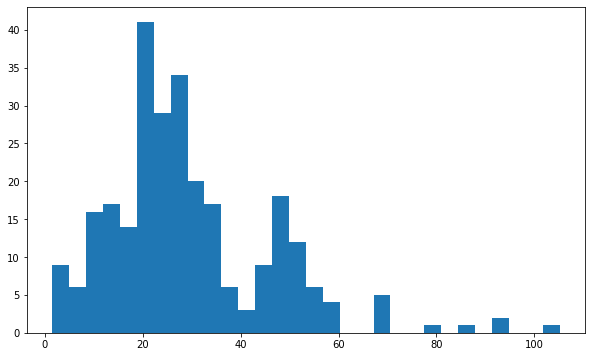

In [23]:
plt.figure(figsize=(10,6))
plt.hist(plants[plants['Status']==0]['Age'],bins=30);

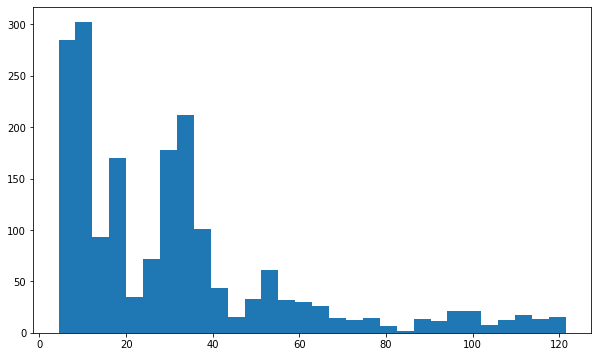

In [24]:
plt.figure(figsize=(10,6))
plt.hist(plants[plants['Status']==1]['Age'],bins=30);

In [25]:
plants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2141 entries, 0 to 2140
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Plant Type Code    2140 non-null   object        
 1   RPS Eligible       2140 non-null   object        
 2   Primary Fuel Type  2139 non-null   object        
 3   Solar Thermal      2140 non-null   object        
 4   Small Hydro        2140 non-null   object        
 5   CEC Plant ID       2140 non-null   object        
 6   EIA Plant ID       2130 non-null   object        
 7   Plant Name         2140 non-null   object        
 8   Unit               2140 non-null   object        
 9   State              2140 non-null   object        
 10  County             2140 non-null   object        
 11  City               2078 non-null   object        
 12  Start Date         2140 non-null   datetime64[ns]
 13  Retire Date        271 non-null    datetime64[ns]
 14  2014    

In [26]:
gen_timeseries = plants.groupby('County').sum()

In [27]:
gen_timeseries['County'] = gen_timeseries.index

In [28]:
newindex = list(range(56))
gen_timeseries['newindex'] = newindex
gen_timeseries.set_index('newindex',inplace=True)
gen_timeseries.head(11)

,2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001,Status,County
newindex,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,ALL
1,1181.3,1176.9,536.9,322.4,316.4,321.9,321.9,321.9,253.4,263.5,263.5,263.5,263.5,263.5,38,Alameda
2,251.0,248.0,221.0,237.4,237.4,242.7,242.7,245.7,241.6,244.6,244.6,244.6,262.6,259.6,19,Amador
3,1124.5,1124.5,1120.2,1134.5,1134.5,1135.0,1133.6,1135.0,1135.0,1140.9,1140.9,1141.6,1141.6,1272.1,42,Butte
4,297.3,297.3,287.3,285.5,285.5,285.5,285.5,285.5,534.6,534.6,534.6,285.5,285.5,285.5,16,Calaveras
5,721.1,721.1,721.1,721.1,721.1,29.1,29.1,29.0,29.0,29.0,29.0,29.0,29.0,29.0,4,Colusa
6,5062.6,5064.1,4914.6,4999.1,4989.1,5057.9,4441.1,4453.1,4422.7,4426.7,4443.7,4443.7,5048.4,4244.2,50,Contra Costa
7,764.7,764.7,764.7,764.7,764.7,738.7,738.7,738.7,738.7,738.7,738.7,738.7,738.7,738.7,16,El Dorado
8,3881.8,3824.5,3776.2,3707.1,3703.6,3665.4,3122.1,3122.1,3122.1,3025.8,2975.8,3000.8,3000.8,2831.8,85,Fresno


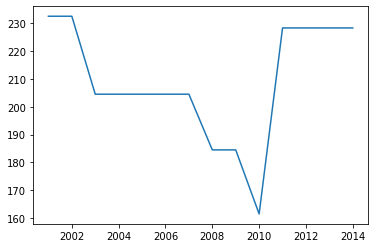

In [29]:
years = [2014,2013,2012,2011,2010,2009,2008,2007,2006,2005,2004,2003,2002,2001]
plt.plot(years,gen_timeseries.iloc[10,0:14])

In [30]:
mark = 0
diffs = []
for i in range(13):
    print(gen_timeseries.iloc[10,0] - gen_timeseries.iloc[10,i+1])

0.0
0.0
0.0
66.79999999999995
43.799999999999926
43.799999999999926
23.799999999999926
23.799999999999926
23.799999999999926
23.799999999999926
23.799999999999926
-4.200000000000074
-4.200000000000074


PO2theSteeGress.

### Aggregate power by county and export

In [33]:
county_gen = plants.groupby('County')['2014'].sum()

In [34]:
county_gen = pd.DataFrame(county_gen.iloc[1:])

In [35]:
county_gen.head()

,2014
County,
Alameda,1181.3
Amador,251.0
Butte,1124.5
Calaveras,297.3
Colusa,721.1


In [36]:
county_gen['name'] = county_gen.index

In [37]:
county_gen['nu_index'] = list(range(55))

In [38]:
county_gen.set_index('nu_index',inplace=True)

In [39]:
county_gen.rename(columns={'2014':'generation_14'},inplace=True)
county_gen.head()

,generation_14,name
nu_index,,
0,1181.3,Alameda
1,251.0,Amador
2,1124.5,Butte
3,297.3,Calaveras
4,721.1,Colusa


In [40]:
county_gen.to_csv('datasets/county_gen14.csv',index=False)

### CGEC Powerplants

In [37]:
cgec = pd.read_csv('datasets/California_Power_Plants.csv')

In [38]:
cgec.shape

(2506, 56)

In [39]:
cgec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2506 entries, 0 to 2505
Data columns (total 56 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   OBJECTID_12_13                2506 non-null   int64  
 1   Plant_ID                      2506 non-null   object 
 2   Plant_Alias                   1516 non-null   object 
 3   Plant_Label                   2506 non-null   object 
 4   MW                            2491 non-null   float64
 5   Gross_MWh                     1565 non-null   float64
 6   Net_MWh                       1548 non-null   float64
 7   General_Fuel                  2504 non-null   object 
 8   Status                        2495 non-null   object 
 9   STEP_License_Status           197 non-null    object 
 10  Gen_Count                     1808 non-null   float64
 11  Initial_Start_Date            1809 non-null   float64
 12  Online_Year                   1810 non-null   float64
 13  Ret

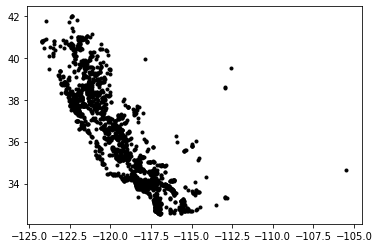

In [40]:
plt.plot(cgec['Longitude'],cgec['Latitude'],'k.')

In [41]:
cgec['General_Fuel'].value_counts()

Solar            903
Gas              658
Hydro            420
Wind             213
Landfill Gas      80
Biomass           70
Geothermal        55
Digester Gas      29
Coal              21
Solar Thermal     19
Battery           16
MSW               16
Nuclear            4
Name: General_Fuel, dtype: int64

In [45]:
county_portfolio = pd.pivot_table(cgec,values='MW',index='County',columns='General_Fuel',aggfunc=np.sum)
county_portfolio.fillna(0,inplace=True)

In [48]:
county_portfolio[county_portfolio['Nuclear'] > 0]

General_Fuel,Battery,Biomass,Coal,Digester Gas,Gas,Geothermal,Hydro,Landfill Gas,MSW,Nuclear,Solar,Solar Thermal,Wind
County,,,,,,,,,,,,,
Humboldt,0.0,109.3,0.0,0.0,168.080,0.0,1.53,0.00,0.0,65.28,0.000,0.0,0.0
Sacramento,0.0,10.5,0.0,0.0,1624.000,0.0,212.22,15.15,0.0,875.00,155.240,0.0,0.0
San Diego,37.5,103.5,0.0,14.5,4620.141,0.0,58.23,32.35,70.0,1127.00,112.235,0.0,182.0
San Luis Obispo,0.0,0.0,0.0,0.0,1356.300,0.0,0.90,1.50,0.0,2323.00,810.040,177.0,0.0
